# Data visualization

Loading libraries:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data on the outflow of clients of a certain bank is presented.

In [ ]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Table columns:

1. RowNumber — the table row number (this is unnecessary information, so you can get rid of it right away)
2. CustomerId — the customer's ID
3. Surname — the customer's last name
4. CreditScore — the customer's credit rating (the higher it is, the more loans the customer has taken out and repaid)
5. Geography — the customer's country (international bank)
6. Gender — the customer's gender
7. Age — the customer's age
8. Tenure — how many years the client has been using the bank's services
9. Balance — the client's account balance with the bank
10. NumOfProducts — the number of bank services the client has purchased
11. HasCrCard — does the client have a credit card (1 — yes, 0 — no)
12. IsActiveMember — is the client an active client of the bank (1 — yes, 0 — no)
13. EstimatedSalary — the client's estimated salary
14. Exited — loyalty status (1 — exited client, 0 — loyal client)

In [13]:
churn_data = churn_data.drop('RowNumber', axis=1)

So, a bank is asking you for help: they want to develop a loyalty campaign to retain customers, but to do so, they need you to identify the root causes of customer churn. In other words, you need to **determine how churners differ from loyal customers and how the various characteristics that define customers are interconnected**.

After conducting exploratory analysis to identify the most important indicators of churn, the bank will be able to build a machine learning model that will predict customer departure.

1. What is the ratio of churn to loyal customers? Show this on a graph and comment on the ratio.

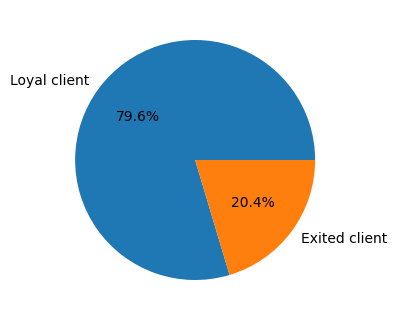

In [118]:
exited_counts = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_counts,
    labels=['Loyal client', 'Exited client'],
    autopct='%.1f%%'
);

Most of the clients are loyal, but unfortunately 1/5 have left.

2. Plot a graph showing the balance distribution for users with accounts greater than $2,500. Describe the distribution and draw conclusions.

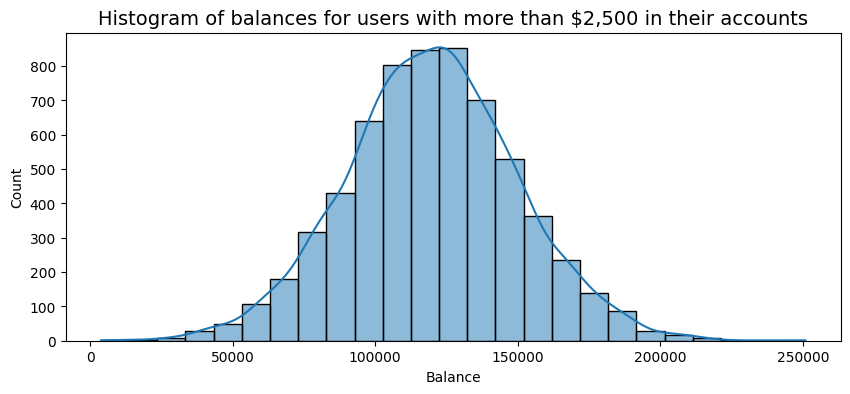

In [25]:
fig = plt.figure(figsize=(10, 4))
histplot = sns.histplot(
    data=churn_data[churn_data['Balance'] > 2500],
    x='Balance',
    bins=25,
    kde=True
)
histplot.set_title('Histogram of balances for users with more than $2,500 in their accounts', fontsize=14);

The distribution is very similar to normal. Most of the selected users have balances between $100,000 and $150,000.

3. Look at the customer balance distribution by churn indicator. How do the savings account balances of churners and loyal customers differ? Consider and write down the possible reasons for this, and what might be causing churners to be dissatisfied with the bank.

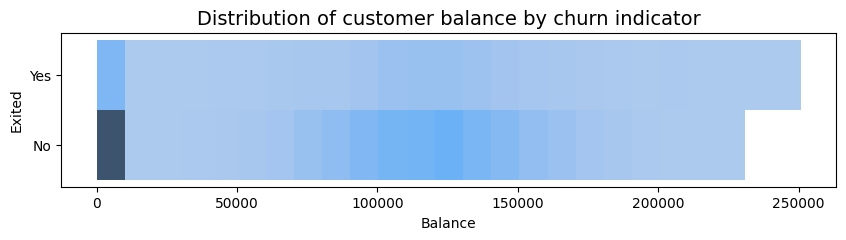

In [40]:
exit_as_cat = churn_data.copy()
exit_as_cat['Exited'] = exit_as_cat['Exited'].apply(lambda x: 'Yes' if x else 'No')
fig = plt.figure(figsize=(10, 2))
histplot = sns.histplot(
    data=exit_as_cat,
    x='Balance',
    y='Exited',
    bins=25
)
histplot.set_title('Distribution of customer balance by churn indicator', fontsize=14);

All of the largest clients, with balances of $230,000 or more, have left the bank. Perhaps other banks offer more favorable terms for VIP clients.

4. Look at the age distribution for the churn indicator. Which group has the most potential outliers? Which age group of customers should the bank focus on?

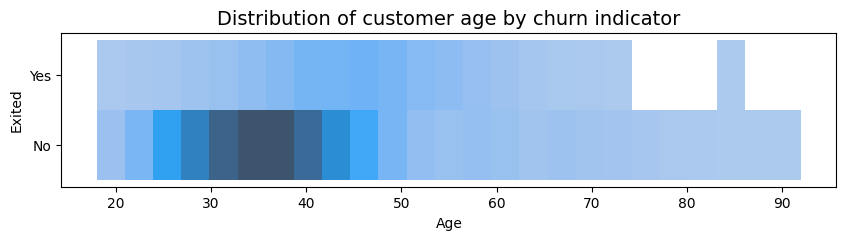

In [45]:
fig = plt.figure(figsize=(10, 2))
histplot = sns.histplot(
    data=exit_as_cat,
    x='Age',
    y='Exited',
    bins=25
)
histplot.set_title('Distribution of customer age by churn indicator', fontsize=14);

Ages ranging from just under 20 to just over 90 are quite reasonable; let's assume there are no outliers. People leave the bank before age 75, with the exception of around 85. The bank should pay attention to clients aged 30 to 40, since the most active phase of outflow begins after 40 years.

5. Create a graph showing the relationship between a client's credit score and their expected salary. Color the graph based on customer churn. What is the relationship between the features?

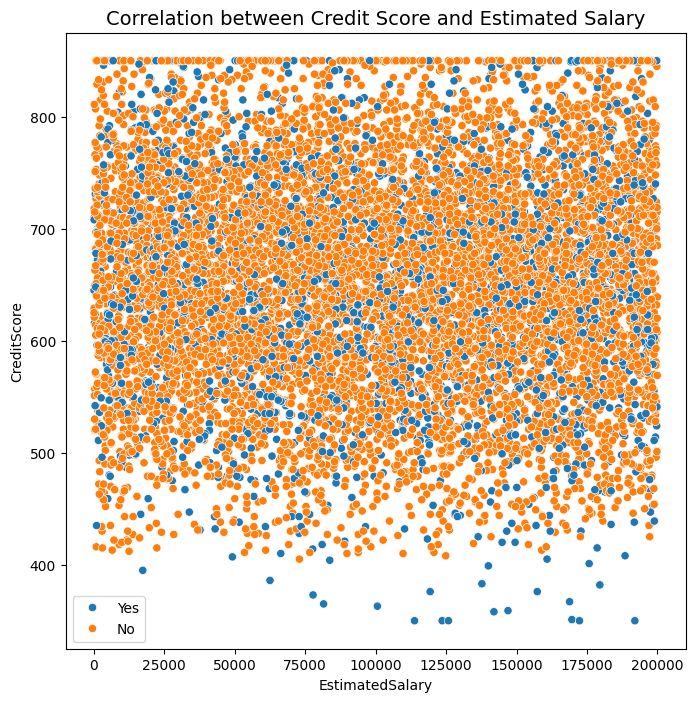

In [52]:
fig = plt.figure(figsize=(8, 8))
scatterplot = sns.scatterplot(
    data=exit_as_cat, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited'
)
scatterplot.set_title("Correlation between Credit Score and Estimated Salary", fontsize=14)
scatterplot.legend();

No correlation is observed.

6. Who quits more often, men or women? Create a graph to illustrate this.

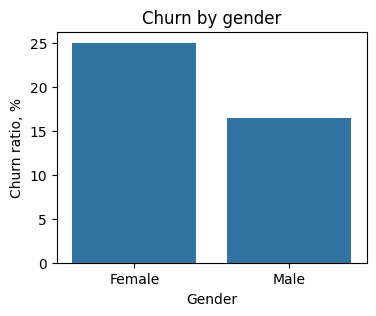

In [ ]:
exit_ratio = churn_data.groupby('Gender', as_index=False)['Exited'].mean()

fig = plt.figure(figsize=(4, 3))
barplot = sns.barplot(
    data=exit_ratio,
    x=exit_ratio['Gender'],
    y=exit_ratio['Exited'] * 100
)
barplot.set_title('Churn by gender')
barplot.set_ylabel('Churn ratio, %');

Women leave more often.

7. How does customer churn depend on the number of services purchased from the bank?

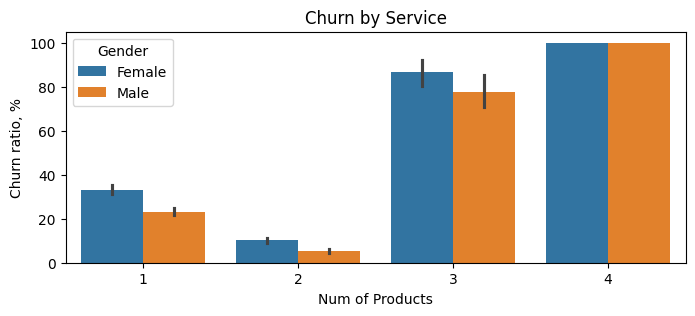

In [72]:
fig = plt.figure(figsize=(8, 3))
barplot = sns.barplot(
    data=churn_data,
    x=churn_data['NumOfProducts'],
    y=churn_data['Exited'] * 100,
    hue='Gender'
)
barplot.set_title('Churn by Service')
barplot.set_xlabel('Num of Products')
barplot.set_ylabel('Churn ratio, %');

Everyone who had 4 services and most of those who had 3 left the bank.

8. How does active customer status affect customer churn? Draw a diagram illustrating this. What would you suggest to the bank to reduce churn among inactive customers?

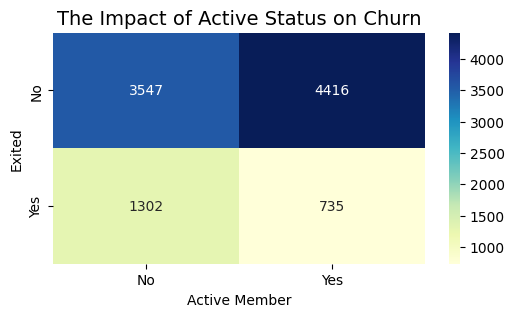

In [ ]:
exit_as_cat['IsActiveMember'] = exit_as_cat['IsActiveMember'].apply(lambda x: 'Yes' if x else 'No')
active_pivot = exit_as_cat.pivot_table(
    index='Exited',
    columns='IsActiveMember',
    values='CustomerId',
    aggfunc='count'
)

fig = plt.figure(figsize=(6, 3))
heatmap = sns.heatmap(data=active_pivot, cmap='YlGnBu', annot=True, fmt='d')
heatmap.set_title('The Impact of Active Status on Churn', fontsize=14)
heatmap.set_xlabel('Active Member');

Having an active status has a positive impact on customer retention. The bank should conduct a campaign to motivate customers to obtain active status.

9. Which country has the highest rate of customer churn? What might be the reason for this?

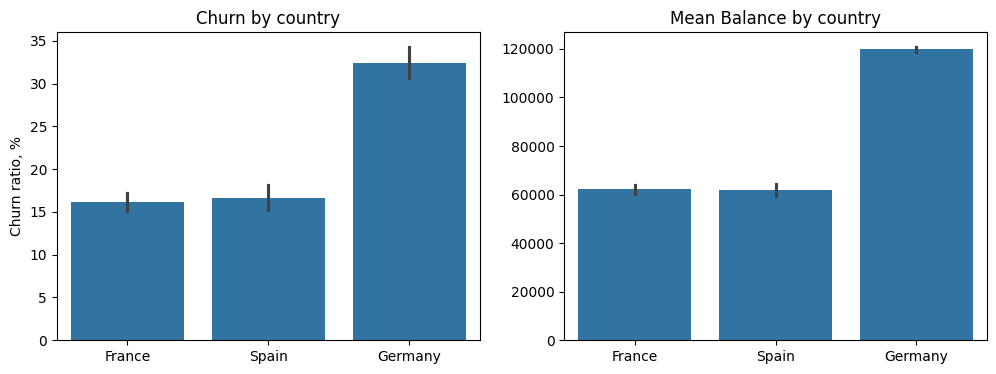

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# mean churn by country
countries = sns.barplot(
    data=churn_data,
    x=churn_data['Geography'],
    y=churn_data['Exited'] * 100,
    ax=axes[0]
)
countries.set_title('Churn by country')
countries.set_xlabel('')
countries.set_ylabel('Churn ratio, %')

# mean balance by country
balances = sns.barplot(
    data=churn_data,
    x=churn_data['Geography'],
    y=churn_data['Balance'],
    ax=axes[1]
)
balances.set_title('Mean Balance by country')
balances.set_xlabel('')
balances.set_ylabel('');

German clients are twice as likely to leave the bank, yet their average balance is twice as large. The bank should consider retaining large clients.

10. Convert the CreditScore numeric metric to a categorical one. Build a pivot table with the rows representing the credit score categories (CreditScoreCat) and the columns representing the number of years the customer has been using the bank's services (Tenure). The pivot table cells should contain the average churn rate (Exited)—the percentage of customers who left.

Based on the resulting pivot table, build a heat map with annotations. Use the heat map to identify the customer categories that churn most frequently.

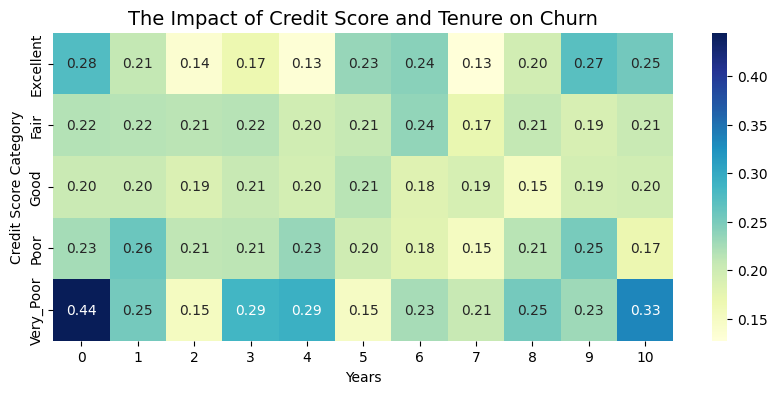

In [116]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited'
)

fig = plt.figure(figsize=(10, 4))
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu', annot=True, fmt='.2f')
heatmap.set_title('The Impact of Credit Score and Tenure on Churn', fontsize=14)
heatmap.set_xlabel('Years')
heatmap.set_ylabel('Credit Score Category');

Most often leaves clients with the lowest credit ratings who have been using the bank's services for less than a year.